# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [29]:
# Load pickled data
import pickle
import numpy as np

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print ('done')



done


In [30]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = (np.max(y_train))-(np.min(y_train))+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


train data shape  (39209, 32, 32, 3)
train label shape  (39209,)
test data shape  (12630, 32, 32, 3)
test label shape  (12630,)
sign class  Speed limit (20km/h)
found at index  0


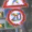

sign class  Speed limit (30km/h)
found at index  210


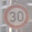

sign class  Speed limit (50km/h)
found at index  2430


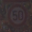

sign class  Speed limit (60km/h)
found at index  4680


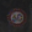

sign class  Speed limit (70km/h)
found at index  6090


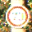

sign class  Speed limit (80km/h)
found at index  8070


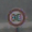

sign class  End of speed limit (80km/h)
found at index  9930


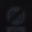

sign class  Speed limit (100km/h)
found at index  10350


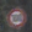

sign class  Speed limit (120km/h)
found at index  11790


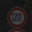

sign class  No passing
found at index  13200


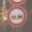

sign class  No passing for vechiles over 3.5 metric tons
found at index  14670


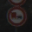

sign class  Right-of-way at the next intersection
found at index  16680


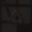

sign class  Priority road
found at index  18000


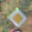

sign class  Yield
found at index  20100


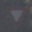

sign class  Stop
found at index  22260


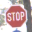

sign class  No vechiles
found at index  23040


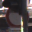

sign class  Vechiles over 3.5 metric tons prohibited
found at index  23670


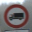

sign class  No entry
found at index  24090


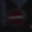

sign class  General caution
found at index  25200


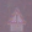

sign class  Dangerous curve to the left
found at index  26400


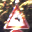

sign class  Dangerous curve to the right
found at index  26610


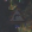

sign class  Double curve
found at index  26970


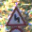

sign class  Bumpy road
found at index  27300


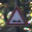

sign class  Slippery road
found at index  27690


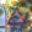

sign class  Road narrows on the right
found at index  28200


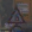

sign class  Road work
found at index  28470


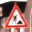

sign class  Traffic signals
found at index  29970


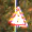

sign class  Pedestrians
found at index  30570


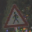

sign class  Children crossing
found at index  30810


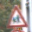

sign class  Bicycles crossing
found at index  31350


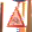

sign class  Beware of ice/snow
found at index  31620


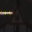

sign class  Wild animals crossing
found at index  32070


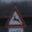

sign class  End of all speed and passing limits
found at index  32850


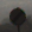

sign class  Turn right ahead
found at index  33090


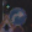

sign class  Turn left ahead
found at index  33779


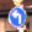

sign class  Ahead only
found at index  34199


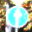

sign class  Go straight or right
found at index  35399


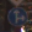

sign class  Go straight or left
found at index  35789


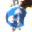

sign class  Keep right
found at index  35999


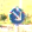

sign class  Keep left
found at index  38069


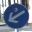

sign class  Roundabout mandatory
found at index  38369


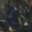

sign class  End of no passing
found at index  38729


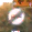

sign class  End of no passing by vechiles over 3.5 metric tons
found at index  38969


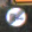

train minbin value 186
train maxbin value 2226
train shape  (38177, 32, 32, 3)
train label shape  (38177,)
valid shape  (1032, 32, 32, 3)
valid label shape  (1032,)
test shape  (12630, 32, 32, 3)
test label shape  (12630,)


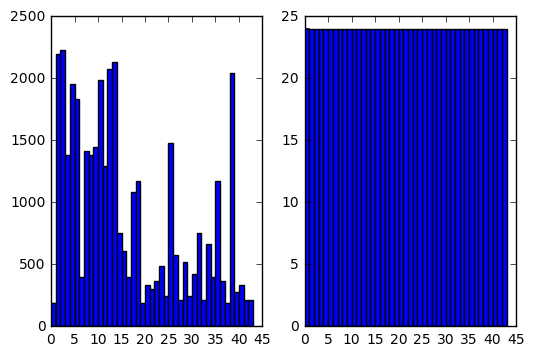

In [31]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import csv
%matplotlib inline

print ('train data shape ',X_train.shape)
print ('train label shape ',y_train.shape)
print ('test data shape ',X_test.shape)
print ('test label shape ',y_test.shape)

names = []
with open('signnames.csv', 'r') as csvfile:
    myreader = csv.reader(csvfile)
    for row in myreader:
        names.append(row)
names = names[1:]

# cycle through all the sign class images
j = 0
for i in range(n_classes):
    
    found = False
    while not found and j < n_train:
        if y_train[j] == i:
            found = True
            img = X_train[j]
            print ('sign class ',names[i][1])
            print ('found at index ',j)
            display(Image.fromarray(img, 'RGB'))    
        j+=1

valid_samples = 24 # how many samples per class in valid
X_valid = np.zeros((valid_samples*n_classes,32,32,3))
y_valid = np.zeros((valid_samples*n_classes))
valid_index = []
j = 0
for i in range(n_classes):
    sample_count = 0
    while sample_count < valid_samples and j < n_train:
        if y_train[j] == i:
            X_valid[len(valid_index)] = X_train[j]
            y_valid[len(valid_index)] = y_train[j]
            valid_index.append(j)
            sample_count+=1
        j+=1

# take values from train and put them in valid
X_train = np.delete(X_train,valid_index,axis=0)
y_train = np.delete(y_train,valid_index,axis=0)
        
_, (ax1, ax2) = plt.subplots(1, 2)

#See how balanced the train and valid data set is            
ax1.hist(y_train,bins=n_classes, range=[0,n_classes]);
ax2.hist(y_valid,bins=n_classes, range=[0,n_classes]);

bin_counts = np.bincount(y_train)
print ('train minbin value', np.amin(bin_counts))
print ('train maxbin value', np.amax(bin_counts))

# the sizes of the data now
print ('train shape ',X_train.shape)
print ('train label shape ',y_train.shape)

print ('valid shape ',X_valid.shape)
print ('valid label shape ',y_valid.shape)

print ('test shape ',X_test.shape)
print ('test label shape ',y_test.shape)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

max training feature value  255
min training feature value  0
average training feature value  82.3042425041
before hot endcoding  10
after hot encoding  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
max training feature value  0.5
min training feature value  -0.5
average training feature value  -0.177239
train dataset shape  (38177, 32, 32, 3)
train label shape  (38177, 43)
valid dataset shape  (1032, 32, 32, 3)
valid label shape  (1032, 43)
test dataset shape  (12630, 32, 32, 3)
test label shape  (12630, 43)


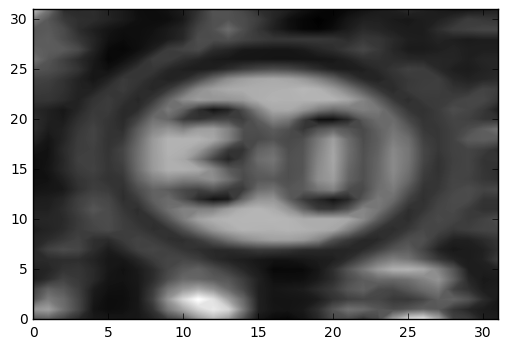

In [34]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

print ('max training feature value ',np.amax(X_train))
print ('min training feature value ',np.amin(X_train))
print ('average training feature value ',np.mean(X_train))

def reformat(data, labels):
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(n_classes) == labels[:,None]).astype(np.float32)
    data = (data.astype(np.float32) - (255 / 2.0)) / 255
    return data, labels

#reformat to 1-Hot encoding
train_dataset, train_labels = reformat(X_train, y_train)
valid_dataset, valid_labels = reformat(X_valid, y_valid)
test_dataset, test_labels = reformat(X_test, y_test)

# example of how 1-hot encoding looks now
print ('before hot endcoding ',y_train[14670])
print ('after hot encoding ',train_labels[14670])

# lets make sure the dataset still looks good after converting
plt.contourf(train_dataset[224,:,:,1],255, cmap='gray')
print ('max training feature value ',np.amax(train_dataset))
print ('min training feature value ',np.amin(train_dataset))
print ('average training feature value ',np.mean(train_dataset))

# shuffle the label and datasets
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:,:]
    shuffled_labels = labels[permutation,:]
    return shuffled_dataset, shuffled_labels

train_dataset, train_labels = randomize(train_dataset, train_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)

print ('train dataset shape ',train_dataset.shape)
print ('train label shape ',train_labels.shape)

print ('valid dataset shape ',valid_dataset.shape)
print ('valid label shape ',valid_labels.shape)

print ('test dataset shape ',test_dataset.shape)
print ('test label shape ',test_labels.shape)


### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**  The images were converted into floating values with a max of .5 and a min of -.5. The reason images were converted to this format was to have centered mean and low standard deviation, this is to help with convergence in the network. Labels were converted into 1-hot encode values, this means for 43 different classes the 1-hot value would be a single 1 in the array position for the class and zeros every where else. 

In [65]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

batch_size = 64
train_size = train_labels.shape[0]

def accuracy(predictions, labels):
    #print (predictions)
    #print (labels)
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])



### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** The testing data was the same loaded from the pickle file. The training data was first split into two groups, the data that would acutally be trained on the neural net and the validation data which the neural net actually would not directly optimize loss on. The valid dataset was created to be balanced with 24 samples from each class creating a total size of 1032. The training data on the other hand is not very balanced as can be seen from its histogram above, but the training dataset still has atleast 186 samples per class. No additional data was generated since the total training size of 38177 seemed like a decent size to at least get results over 90% for testing accuracy. All the training, valid, and test datasets where shuffled which is an important step during training, it wasnt entirely necessary to shuffle the test or valid datasets how ever, but doesnt hurt.

In [66]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

sess = tf.InteractiveSession()
sess.as_default()

# Input data
tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 32, 32, 3))
tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, n_classes))
tf_valid_dataset = tf.constant(valid_dataset)
tf_test_dataset = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))
                                 
layer1_weights = tf.Variable(tf.truncated_normal([5, 5, 3, 16], stddev=0.1))
layer1_biases = tf.Variable(tf.zeros([16]))
layer2_weights = tf.Variable(tf.truncated_normal([5, 5, 16, 32], stddev=0.1))
layer2_biases = tf.Variable(tf.constant(1.0, shape=[32]))
layer3_weights = tf.Variable(tf.truncated_normal(
    [5*5*32, 120], stddev=0.1))
layer3_biases = tf.Variable(tf.constant(1.0, shape=[120]))
layer4_weights = tf.Variable(tf.truncated_normal(
    [120, n_classes], stddev=0.1))
layer4_biases = tf.Variable(tf.constant(1.0, shape=[n_classes]))
# Model.
def model(data, Train=False):
    # input 32x32x3 => output 28x28x6
    conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='VALID')
    hidden = tf.nn.relu(conv + layer1_biases)
    # input 28x28x6 => output 14x14x6
    hidden = tf.nn.max_pool(
                hidden,
                ksize=[1, 2, 2, 1],
                strides=[1, 2, 2, 1],
                padding='VALID')
    # input 14x14x6 => output 10x10x16
    conv = tf.nn.conv2d(hidden, layer2_weights, [1, 1, 1, 1], padding='VALID')
    hidden = tf.nn.relu(conv + layer2_biases)
    # input 10x10x16 => output 5x5x16
    hidden = tf.nn.max_pool(
                hidden,
                ksize=[1, 2, 2, 1],
                strides=[1, 2, 2, 1],
                padding='VALID')
    
    reshape = tf.reshape(hidden, [-1,5*5*32])
    if Train:
        reshape = tf.nn.dropout(reshape, 0.5)
    # input 400 => output 120
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    if Train:
        hidden_layer = tf.nn.dropout(hidden, 0.5)
    # input 120 => output 43
    return tf.matmul(hidden, layer4_weights) + layer4_biases


# Training computation.
logits = model(tf_train_dataset, Train=True)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
regularizers = tf.nn.l2_loss(layer3_weights) + tf.nn.l2_loss(layer3_biases) + \
    tf.nn.l2_loss(layer4_weights) + tf.nn.l2_loss(layer4_biases)
loss += 5e-4 * regularizers    

# Optimizer.
optimizer = tf.train.AdamOptimizer(1e-3).minimize(loss)
  
# Predictions for the training, validation, and test data.
train_prediction = tf.nn.softmax(logits)
valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
test_prediction = tf.nn.softmax(model(tf_test_dataset))

# used for deep visualization
x = tf.placeholder(tf.float32, shape=(1, 32, 32, 3))
conv_1 = tf.nn.relu(tf.nn.conv2d(x, layer1_weights, [1, 1, 1, 1], padding='VALID') + layer1_biases)
pool_1 = tf.nn.max_pool(
    conv_1,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='VALID')
conv_2 = tf.nn.relu(tf.nn.conv2d(pool_1, layer2_weights, [1, 1, 1, 1], padding='VALID') + layer2_biases)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Since images are the primary input here, a convolutional neural network architecture was chosen. The first two inputs to the network are convolutional with max pooling parts and two final fully connected layers. The ouput of the last fully connected layer feeds into a softmax evaluator that generates probabilites for each of the total 43 possible classes. The architecture also incorporates non-linearity by using relu transforms between every convolutional/pooling and fully connected layers. Each convolutional layer has a filter size of 5x5 and pooling 2x2, no padding is every used. Also the convolutional layers go from 16 to 32 in depth.

In [67]:
### Train your model here.
### Feel free to use as many code cells as needed.

num_steps = 6000

tf.initialize_all_variables().run()
print('Initialized')
for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = sess.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
        print('Minibatch loss at step %d: %f' % (step, l))
        print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
        print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))
test_data = sess.run(test_prediction, feed_dict={tf_test_dataset : test_dataset})
print('Test accuracy: %.1f%%' % accuracy(test_data, test_labels))

Initialized
Minibatch loss at step 0: 7.562507
Minibatch accuracy: 0.0%
Validation accuracy: 0.0%
Minibatch loss at step 50: 3.775864
Minibatch accuracy: 3.1%
Validation accuracy: 7.4%
Minibatch loss at step 100: 3.270613
Minibatch accuracy: 25.0%
Validation accuracy: 11.1%
Minibatch loss at step 150: 2.653338
Minibatch accuracy: 45.3%
Validation accuracy: 24.4%
Minibatch loss at step 200: 2.169575
Minibatch accuracy: 45.3%
Validation accuracy: 28.5%
Minibatch loss at step 250: 1.582943
Minibatch accuracy: 57.8%
Validation accuracy: 42.2%
Minibatch loss at step 300: 1.214650
Minibatch accuracy: 75.0%
Validation accuracy: 49.7%
Minibatch loss at step 350: 1.368798
Minibatch accuracy: 62.5%
Validation accuracy: 59.0%
Minibatch loss at step 400: 0.882513
Minibatch accuracy: 82.8%
Validation accuracy: 65.2%
Minibatch loss at step 450: 0.959362
Minibatch accuracy: 78.1%
Validation accuracy: 69.6%
Minibatch loss at step 500: 0.880974
Minibatch accuracy: 75.0%
Validation accuracy: 74.9%
Minib

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** In order to get good test accuracy results, methods such as pooling, drop out, and regularization were used to avoid overfitting. Drop out was only done on the last two fully connected layers during training with a probability of 50% for keeping values. Also regularization was only done on the last two fully connected layers as well which kept its weights from becoming too large. By using an Adam Optimizer fewer hyperparmaters needed to be considered such as learning decay and momentum for gradient decent, which the optimizer already fully incorporated. Batch size is generally best to be as large as what the computer's memory can sufficently handle, a batch size of 64 was decided.  During each step the network tested 64 images in parallel and moved all its weights in the opposite direction of its gradient inorder to minimize its loss function. Using 6000 steps the network saw a total of 384,000 training images and updated its self at every step. The end result was 92.1% accuracy on the valid dataset, and 95.6% on the test dataset.  

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** At first just a very basic CNN was used which was able to get just about 90% for test accuracy. Next more features were slowly added on top of the network such as pooling, dropout, regularization and using the Adam Optimizer. The Adam Optimizer lead to much better test accuracy results once a proper learning rate was fine tuned on it. Once test results started becoming almost 95%, the batch size was doubled from the orginal 32 to 64 and the step amount was taken from 5000 to 6000. This lead to test results over 95%. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

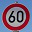

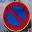

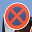

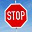

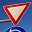

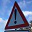

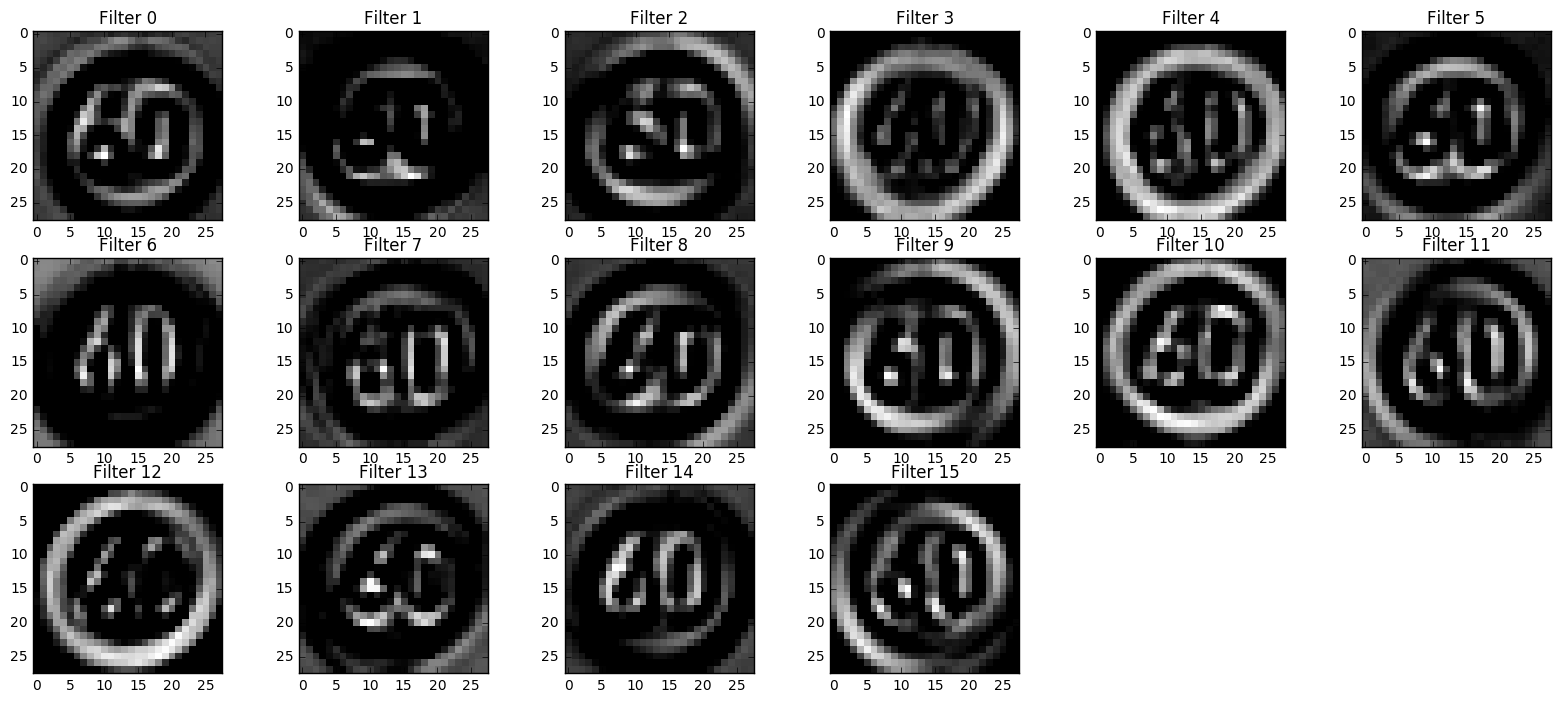

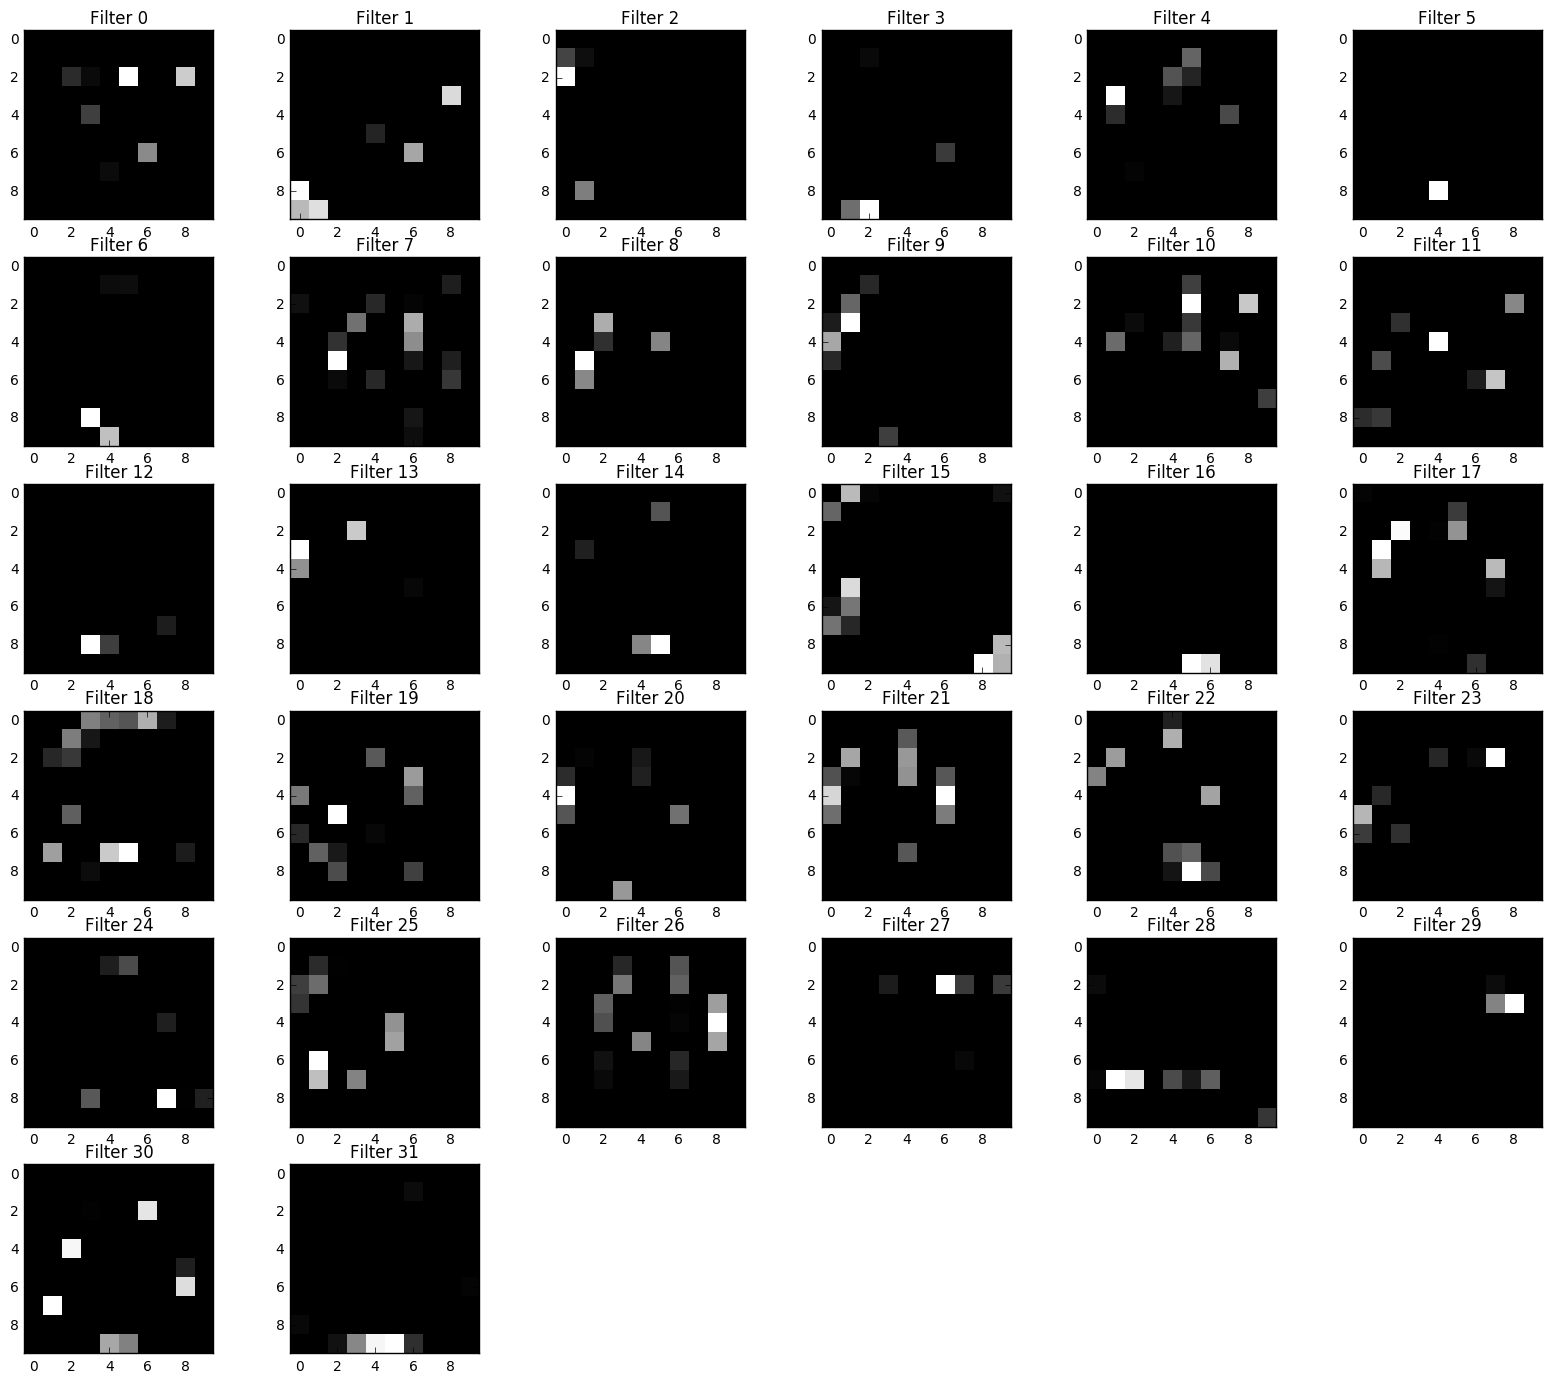

In [78]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
test_images = []

import os
files = os.listdir("test_images/")

for file in files:
    image = mpimg.imread('test_images/'+file)
    test_images.append(image)
    
for image in test_images:
    display(Image.fromarray(image, 'RGB'))
    
# Deep visualization into layers

def getActivations(layer,stimuli, figure):
    stimuli = (stimuli.astype(np.float32) - (255 / 2.0)) / 255
    stimuli = np.reshape(stimuli,(1, 32, 32, 3)).astype(np.float32)
    units = layer.eval(session=sess,feed_dict={x : stimuli})
    plotNNFilter(units, figure)

def plotNNFilter(units,figure):
    filters = units.shape[3]
    plt.figure(figure, figsize=(20,20))
    for i in range(filters):
        plt.subplot(7,6,i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

# visualize output of conv layers
getActivations(conv_1,test_images[0],1)
getActivations(conv_2,test_images[0],2)



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:** For this segment 3 signs were chosen that the classifer is trained on and 2 signs that the classifer has never seen before. The results for the 3 known signs were correct. The pictures were found online and cropped/resized in a way to make it easy for the network to classify on.

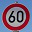

Speed limit (60km/h)


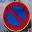

Keep right


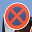

Stop


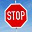

Stop


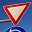

Yield


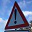

General caution


In [74]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

def predict_image(data):
    data = (data.astype(np.float32) - (255 / 2.0)) / 255
    data = np.reshape(data,(1, 32, 32, 3)).astype(np.float32)
    test_result = sess.run(test_prediction, feed_dict={tf_test_dataset : data})
    #return (test_result)
    return names[np.argmax(test_result)][1]

for image in test_images:
    display(Image.fromarray(image, 'RGB'))
    print (predict_image(image))


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:** Yes the network was able to perform well on the newly captured pictures it was shown. The 3 images that the network had trained on before all had accurate results.

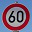

99.9957799911 percent that it is Speed limit (60km/h)
0.00413192028645 percent that it is Speed limit (50km/h)
7.0856236789e-05 percent that it is Speed limit (30km/h)
6.58092815797e-06 percent that it is Wild animals crossing
5.17827025703e-07 percent that it is Double curve


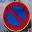

99.2795407772 percent that it is Keep right
0.347923138179 percent that it is Turn left ahead
0.235594902188 percent that it is Go straight or right
0.127375056036 percent that it is Ahead only
0.00608112386544 percent that it is Roundabout mandatory


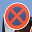

88.9085412025 percent that it is Stop
2.58490499109 percent that it is Yield
2.49961409718 percent that it is Speed limit (20km/h)
1.34608894587 percent that it is Bicycles crossing
0.868969410658 percent that it is Road work


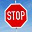

99.9972939491 percent that it is Stop
0.00270352211373 percent that it is No entry
8.12337641598e-08 percent that it is Speed limit (80km/h)
1.57195090278e-10 percent that it is Speed limit (30km/h)
1.52352891587e-10 percent that it is Speed limit (20km/h)


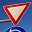

100.0 percent that it is Yield
5.26734433848e-08 percent that it is Children crossing
7.87476750475e-09 percent that it is No vechiles
7.84022222144e-09 percent that it is Priority road
2.17711786099e-09 percent that it is Speed limit (60km/h)


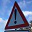

99.8758792877 percent that it is General caution
0.10830659885 percent that it is Traffic signals
0.0134717964102 percent that it is Pedestrians
0.00222383769142 percent that it is Road narrows on the right
7.91029265201e-05 percent that it is Dangerous curve to the right


In [75]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

def top_5(data):
    data = (data.astype(np.float32) - (255 / 2.0)) / 255
    data = np.reshape(data,(1, 32, 32, 3)).astype(np.float32)
    test_result = sess.run(test_prediction, feed_dict={tf_test_dataset : data})
    top_5_index = np.argsort(test_result)
    top_5_index = np.fliplr(top_5_index)
    top_5 = []
    for i in range(5):
        top_5.append(str(test_result[0][top_5_index[0][i]]*100)+' percent that it is '+str(names[top_5_index[0][i]][1]))
    return top_5

for image in test_images:
    display(Image.fromarray(image, 'RGB'))
    top_5s = top_5(image)
    for item in top_5s:
        print (item)


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:** When visualizing percentage results it was interesting to see that for the 3 known images they were all more than 99% confident. For the 2 unknown images it seemed very sure that a no parking sign was actually a keep right, but for the other unkown image it showed more modest percent results. At certain previous times of running the network it sometimes showed very unsure results for the unkown images which was very interesting.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:** A sub function was built to only run the output node of the graph on newly formated images so it could be classifed. As an interesting experiment deep visualization techniques were used to see how a newly aquired image would affect different layers of the convolutional network. It was very interesting to see that certain layers picked out different asspects of the images. For example some layers were really stimulated by certain colors or border edges, while other layers were stimulated by inner markings. As the layers went deeper and the output image shrank, the features were reduced to regions and basic patterns.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.